## Lexical richness

This is an indicator of vocabulary variation. This richness gives us an idea of the number of different terms used in a text and the diversity of the vocabulary.

It is generally concerned with how many different words are used in a text.

In [15]:
# imports
import matplotlib.pyplot as plt
from typing import List, Tuple
import numpy as np
import spacy
import os
import pandas as pd

%matplotlib inline

In [16]:
nlp = spacy.load('en_core_web_sm')

#### Pre-processing

In [17]:
### Creating DataFrame

idir = "/home/akhilesh/civicdatalab/samantar_parsers/data/txts/"
df = pd.DataFrame()
all_data = []
for filename in os.listdir(idir):
    if filename.endswith('.txt'):
        with open(idir + filename, 'r') as f:
            data = f.readlines()
        stripped_data = list(map(lambda x: x.strip(), data))
        clean_data = ' '.join(stripped_data)
        corr = (filename.split(".")[0], clean_data)
        all_data.append(corr)

df = pd.DataFrame(all_data)
df.columns = ['year', 'content']

In [18]:
df.head()

,year,content
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...


### Implementation

Lexical Richness measures:

1. Type token ratio
2. Guiraud R index
3. CTTR (Corrected Type Token Ratio)
4. Herdan index
5. Dugast K index
6. Mass M index
7. Dugast U index
8. Tuldava T index
9. Summer S index
10. STTR (Standardized Type-Token ratio

The reason for discussing different lexical measures is to get a better grip on what lexical measures can tell us. 

In [19]:
## Importing all the measures
from measures.vocab_based import type_token_ratio
from measures.vocab_based import guiraud_r
from measures.vocab_based import cttr
from measures.vocab_based import herdan_c
from measures.vocab_based import dugast_k
from measures.vocab_based import maas_a2
from measures.vocab_based import dugast_u
from measures.vocab_based import tuldava_ln
from measures.vocab_based import summer_s
from measures.vocab_based import sttr

#### Terminologies

- Tokens - Number of words
- Types - Number of different words

In [20]:
## Using Spacy's tokenizer
from spacy.tokenizer import Tokenizer

In [23]:
df['tokenised'] = df.content.apply(lambda x: list(nlp.tokenizer(x)))

In [24]:
df.head()

,year,content,tokenised
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F..."
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF..."
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI..."
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ..."
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o..."


In [28]:
tokens = df['tokenised']

In [39]:
measures = dict(
    type_token_ratio=type_token_ratio,
    guiraud_r=guiraud_r,
    herdan_c=herdan_c,
    dugast_k=dugast_k,
    maas_a2=maas_a2,
    dugast_u=dugast_u,
    tuldava_ln=tuldava_ln,
    cttr=cttr,
    summer_s=summer_s,
    sttr=sttr
)

In [40]:
def get_measures(tokens: List[str], measure: str, window_size: int=100) -> np.float64:
    func = measures[measure]
    total_measure = []
    for i in range(int(len(tokens) / window_size)):
        chunk = tokens[i*window_size: (i*window_size) + window_size]
        txt_len = len(chunk)
        vocab_size = len(set(tokens))
        total_measure.append(func(txt_len, vocab_size))
    return np.mean(total_measure)

In [41]:
df['guiraud_r'] = df['tokenised'].apply(lambda x: get_measures(x, 'guiraud_r'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [43]:
df['type_token_ratio'] = df['tokenised'].apply(lambda x: get_measures(x, 'type_token_ratio'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [44]:
df['herdan_c'] = df['tokenised'].apply(lambda x: get_measures(x, 'herdan_c'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [46]:
%%timeit
df['dugast_k'] = df['tokenised'].apply(lambda x: get_measures(x, 'dugast_k'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


25 s ± 2.73 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%%timeit
df['maas_a2s'] = df['tokenised'].apply(lambda x: get_measures(x, 'maas_a2'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


23 s ± 445 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
df['dugast_u'] = df['tokenised'].apply(lambda x: get_measures(x, 'dugast_u'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [49]:
df['tuldava_ln'] = df['tokenised'].apply(lambda x: get_measures(x, 'tuldava_ln'))

In [50]:
df['cttr'] = df['tokenised'].apply(lambda x: get_measures(x, 'cttr'))

In [51]:
df['summer_s'] = df['tokenised'].apply(lambda x: get_measures(x, 'summer_s'))

In [53]:
# df['sttr'] = df['tokenised'].apply(lambda x: get_measures(x, 'sttr'))

In [54]:
df.head()

,year,content,tokenised,guiraud_r,type_token_ratio,herdan_c,dugast_k,maas_a2,dugast_u,tuldava_ln,cttr,summer_s
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F...",1314.6,131.46,2.059397,6.210057,-0.230045,-4.346974,-0.217147,929.562575,1.473037
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF...",1647.7,164.77,2.108439,6.357943,-0.240694,-4.154644,-0.217147,1165.099843,1.488448
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI...",1086.6,108.66,2.018035,6.085331,-0.221063,-4.523588,-0.217147,768.342228,1.459752
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ...",3113.6,311.36,2.246631,6.774658,-0.270703,-3.694091,-0.217147,2201.647674,1.530018
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o...",2535.3,253.53,2.202015,6.640118,-0.261014,-3.831210,-0.217147,1792.727822,1.516883


In [65]:
df.loc[df.maas_a2.argmax()]

/home/akhilesh/venv/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


year                                                 1977_-_1978_(I)_
content             SPEECH OF SHRI H.M.PATEL MINISTER OF FINANCE  ...
tokenised           [SPEECH, OF, SHRI, H.M.PATEL, MINISTER, OF, FI...
guiraud_r                                                       103.7
type_token_ratio                                                10.37
herdan_c                                                      1.50789
dugast_k                                                        4.547
maas_a2                                                     -0.110287
dugast_u                                                     -9.06727
tuldava_ln                                                  -0.217147
cttr                                                           73.327
summer_s                                                      1.26893
Name: 32, dtype: object

In [78]:
new_df = df.copy()

In [77]:
new_df.head()

,year,content,tokenised,guiraud_r,type_token_ratio,herdan_c,dugast_k,maas_a2,dugast_u,tuldava_ln,cttr,summer_s
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F...",1314.6,131.46,2.059397,6.210057,-0.230045,-4.346974,-0.217147,929.562575,1.473037
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF...",1647.7,164.77,2.108439,6.357943,-0.240694,-4.154644,-0.217147,1165.099843,1.488448
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI...",1086.6,108.66,2.018035,6.085331,-0.221063,-4.523588,-0.217147,768.342228,1.459752
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ...",3113.6,311.36,2.246631,6.774658,-0.270703,-3.694091,-0.217147,2201.647674,1.530018
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o...",2535.3,253.53,2.202015,6.640118,-0.261014,-3.831210,-0.217147,1792.727822,1.516883


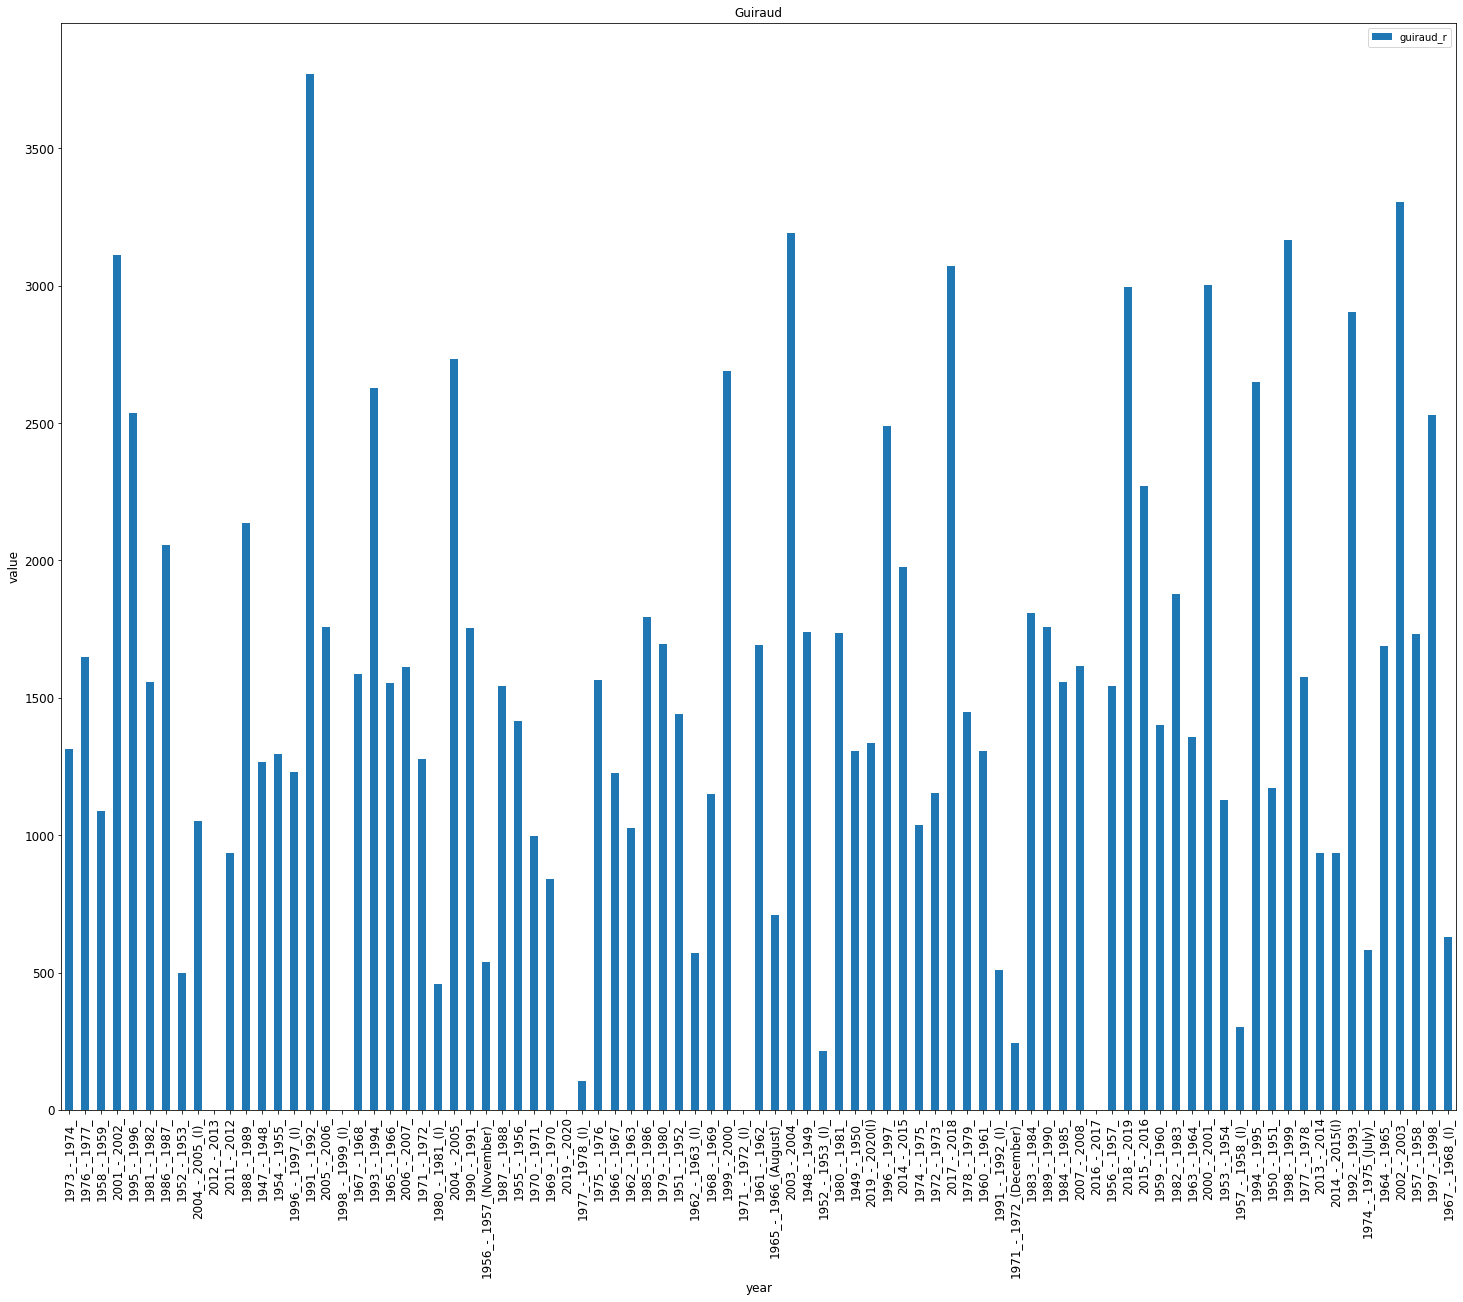

In [93]:
import matplotlib.pyplot as plt
ax = new_df.plot(x='year', y='guiraud_r', kind='bar', title ="Guiraud", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 1991-92 budget is the highest and that of 1977-78(I) is the lowest.

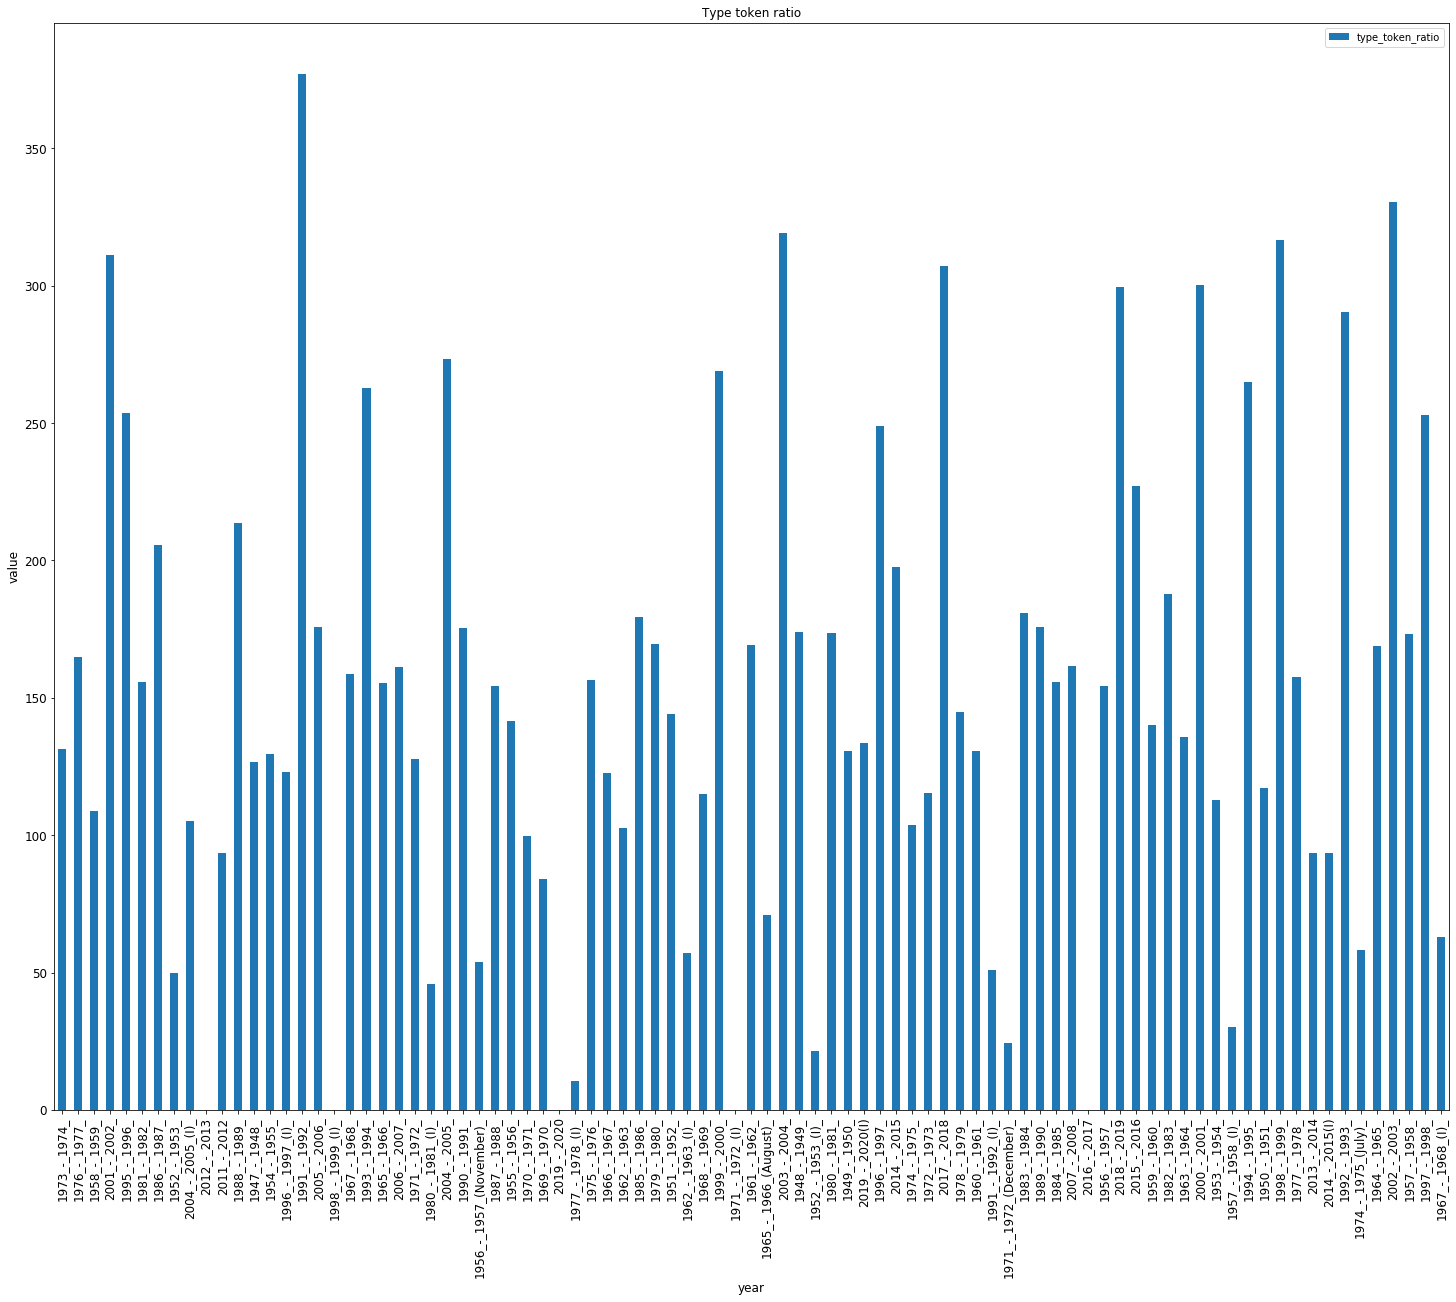

In [101]:
ax = new_df.plot(x='year', y='type_token_ratio', kind='bar', title ="Type token ratio", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 1991-92 budget is the highest and that of 1977-78(I) is the lowest.

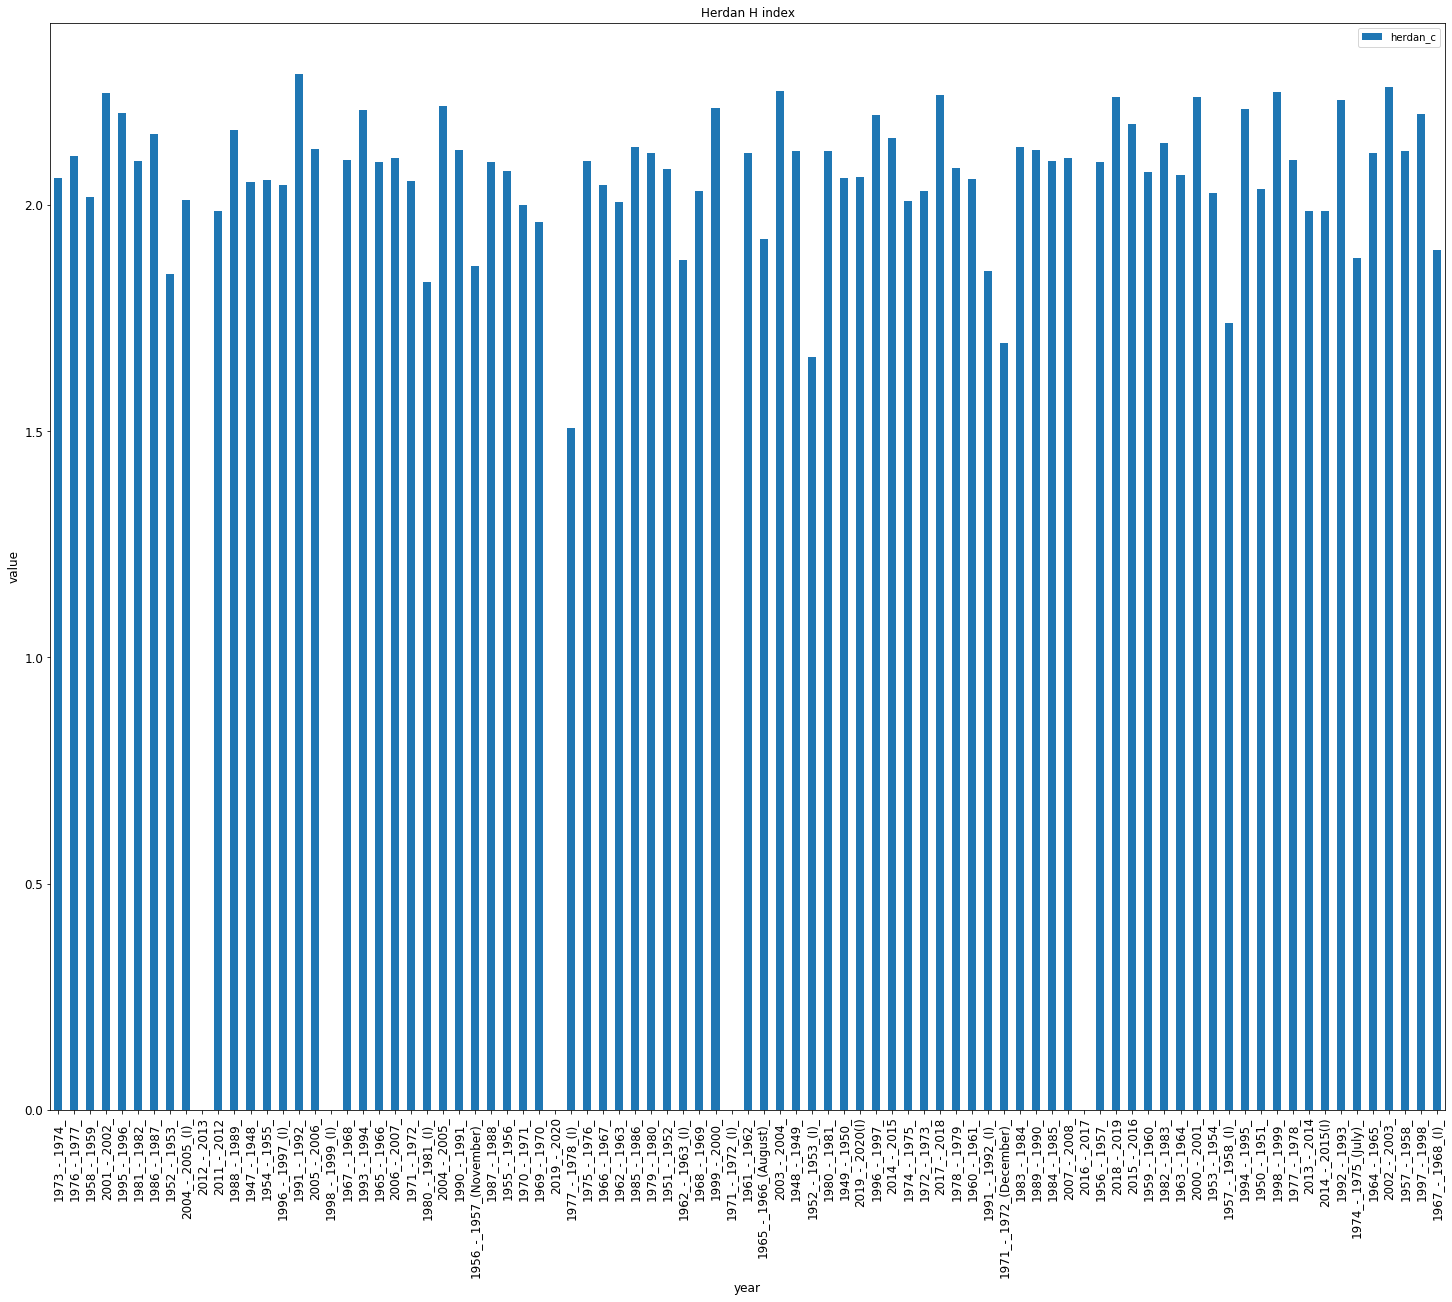

In [102]:
ax = new_df.plot(x='year', y='herdan_c', kind='bar', title ="Herdan H index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 1991-92 budget is the highest and that of 1977-78(I) is the lowest.

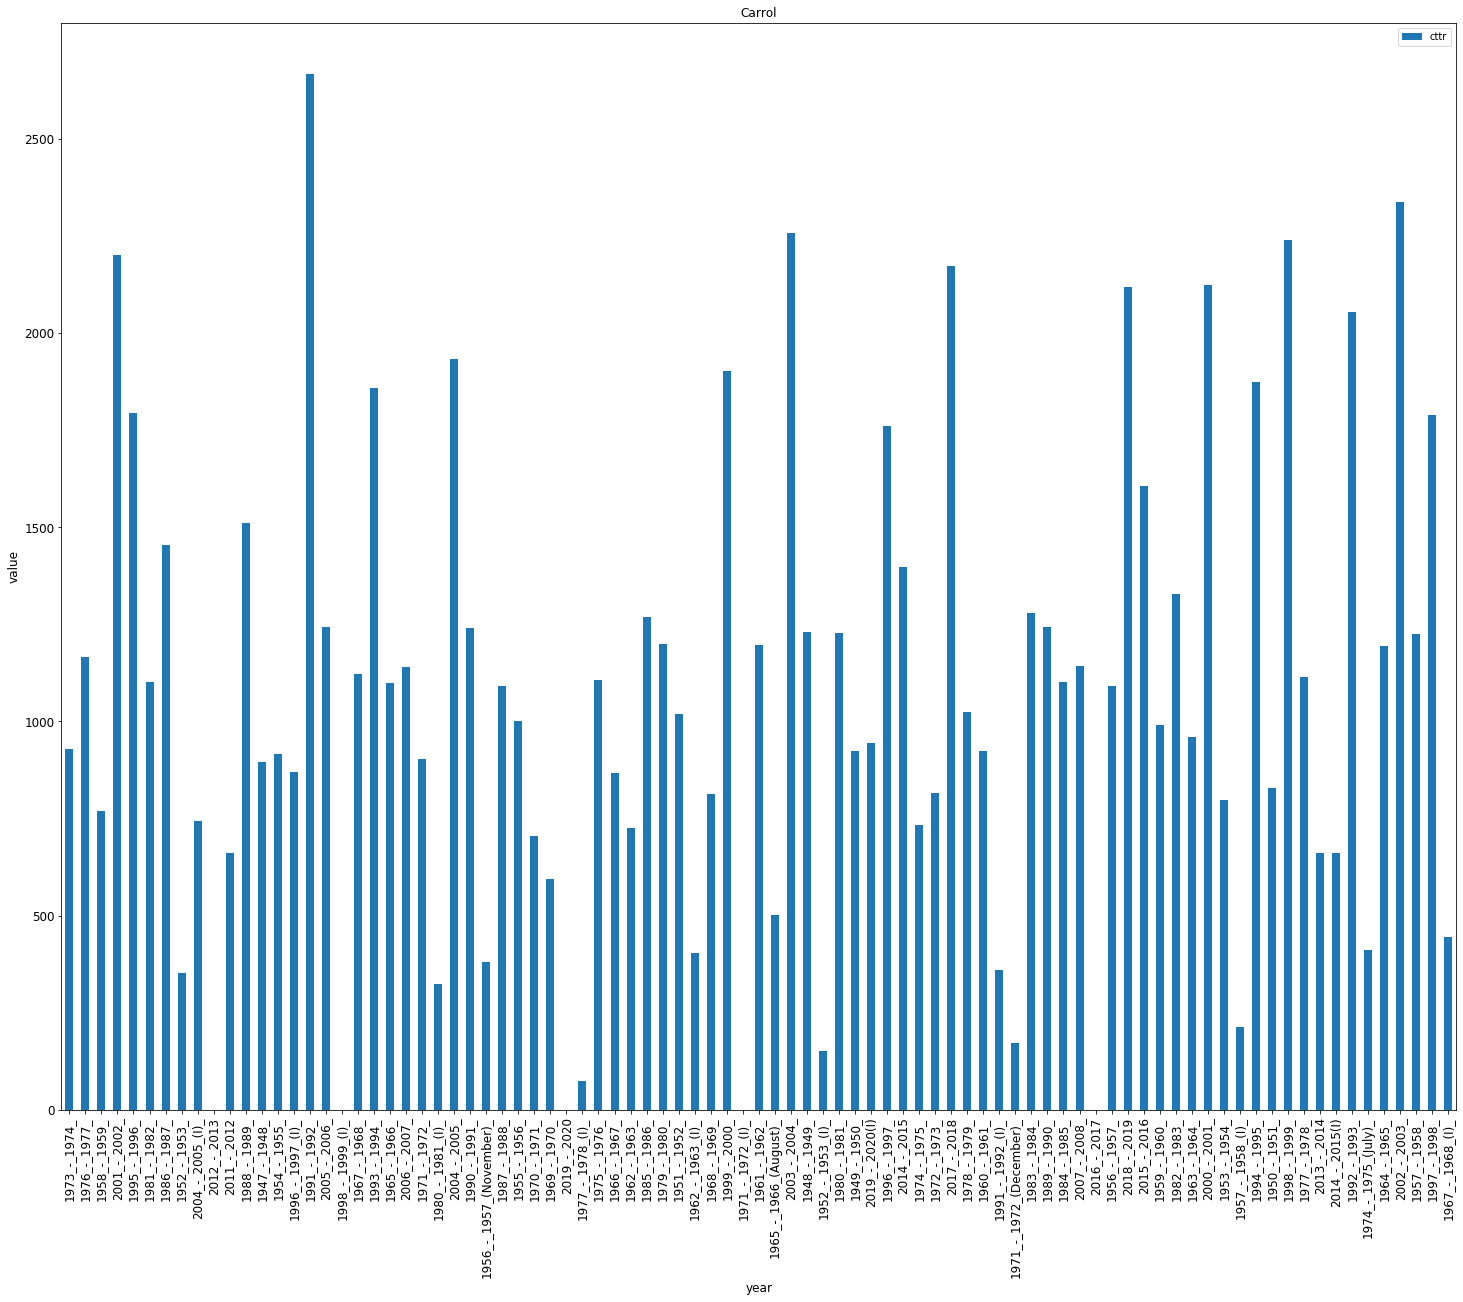

In [104]:
ax = new_df.plot(x='year', y='cttr', kind='bar', title ="Carrol", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 1991-92 budget is the highest and that of 1977-78(I) is the lowest.

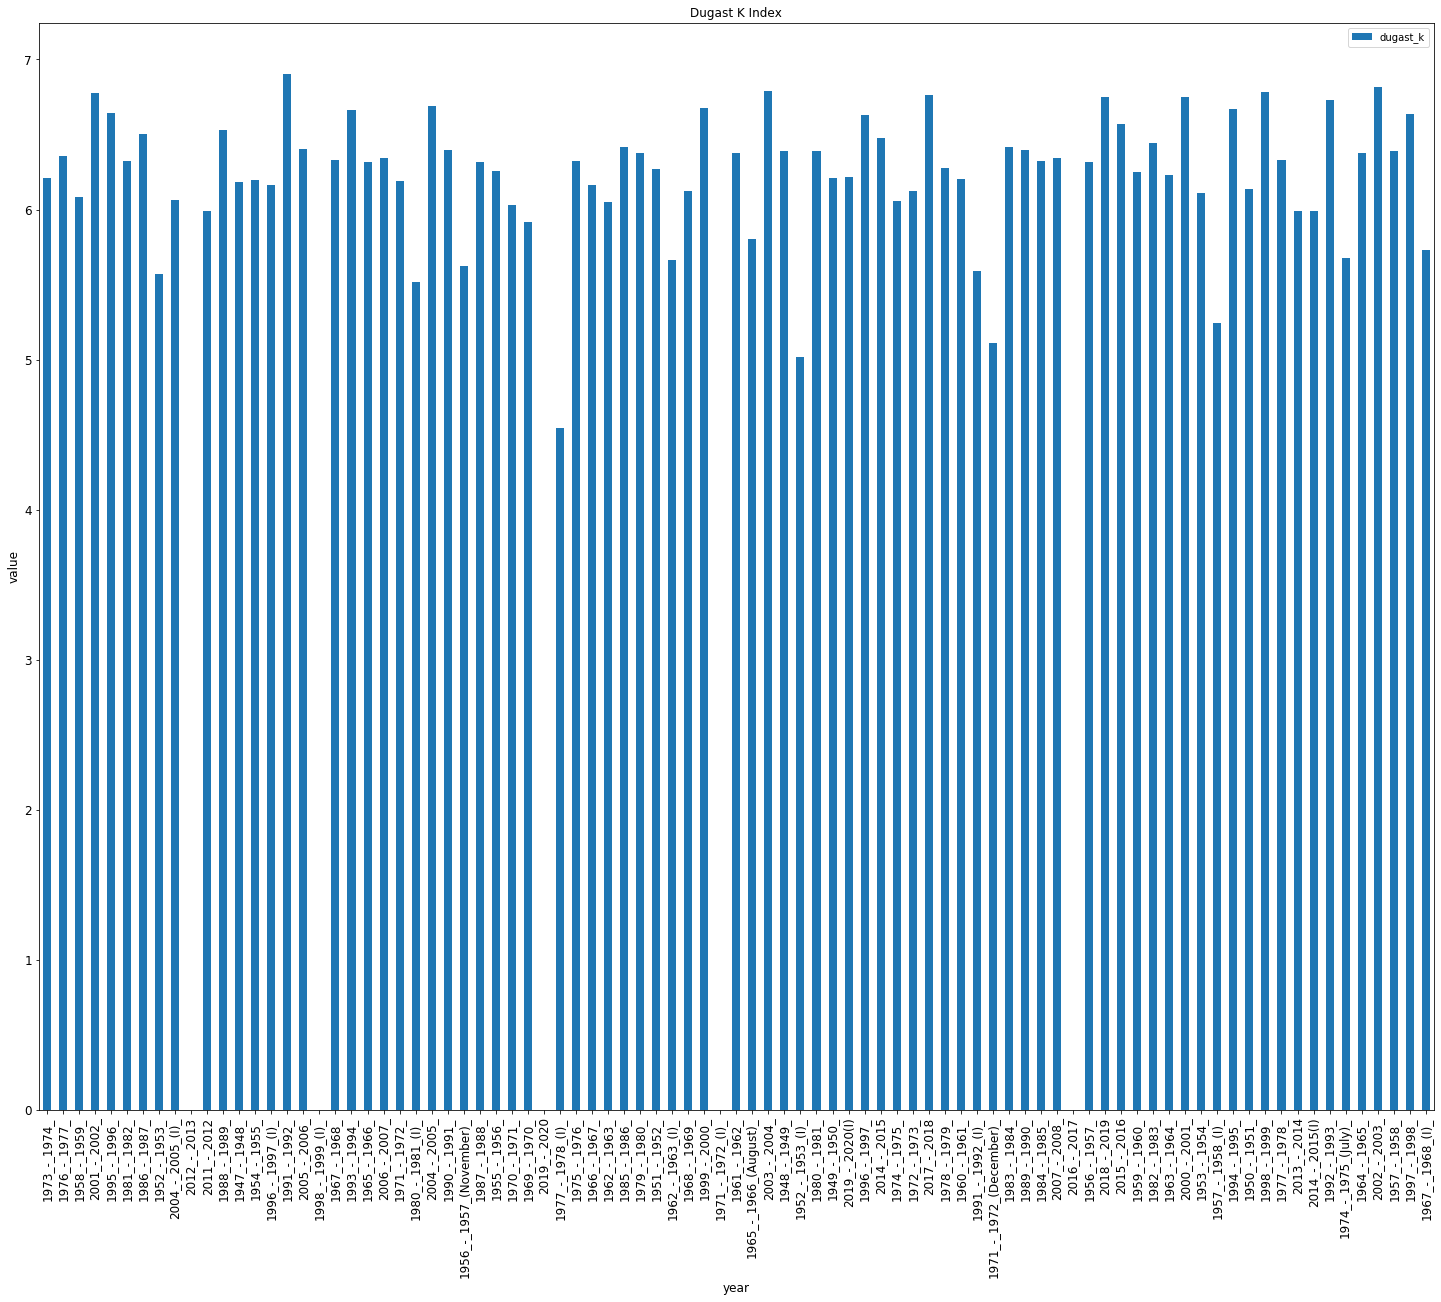

In [100]:
ax = new_df.plot(x='year', y='dugast_k', kind='bar', title ="Dugast K Index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 1991-92 budget is the highest and that of 1977-78(I) is the lowest.

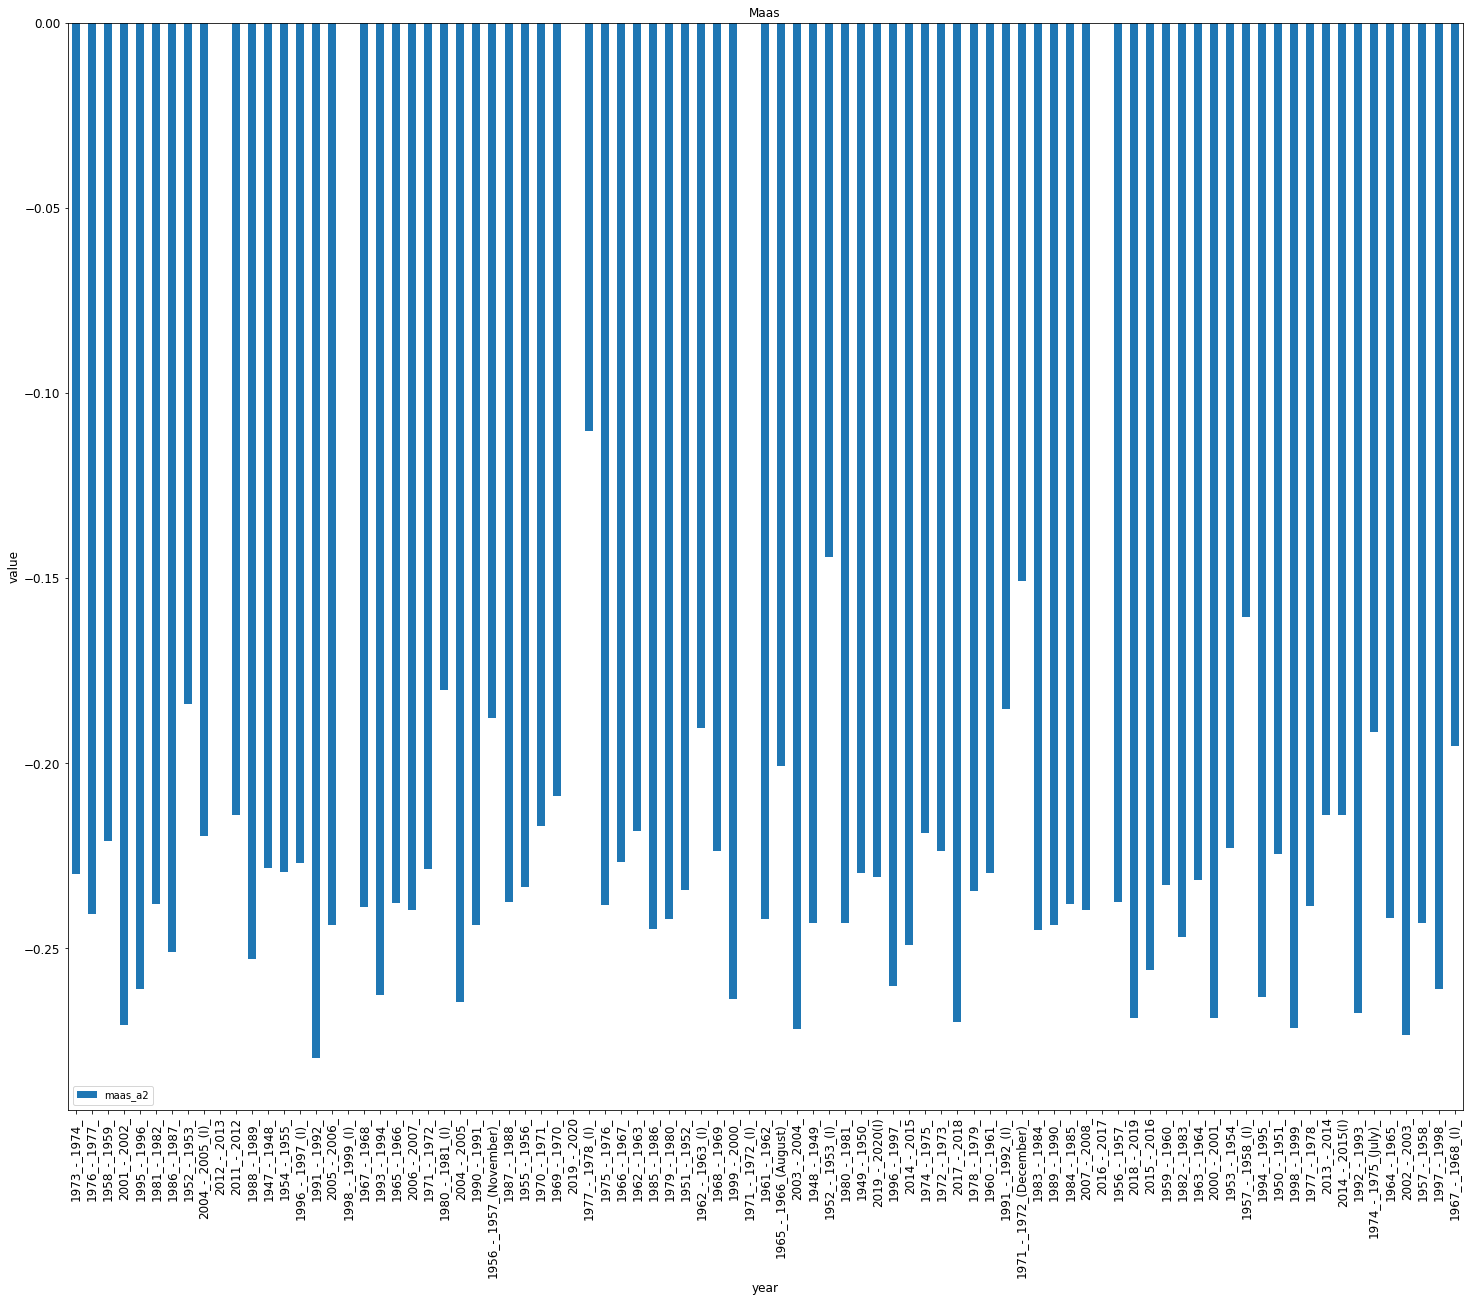

In [99]:
ax = new_df.plot(x='year', y='maas_a2', kind='bar', title ="Maas", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 1991-92 budget is the highest and that of 1977-78(I) is the lowest.

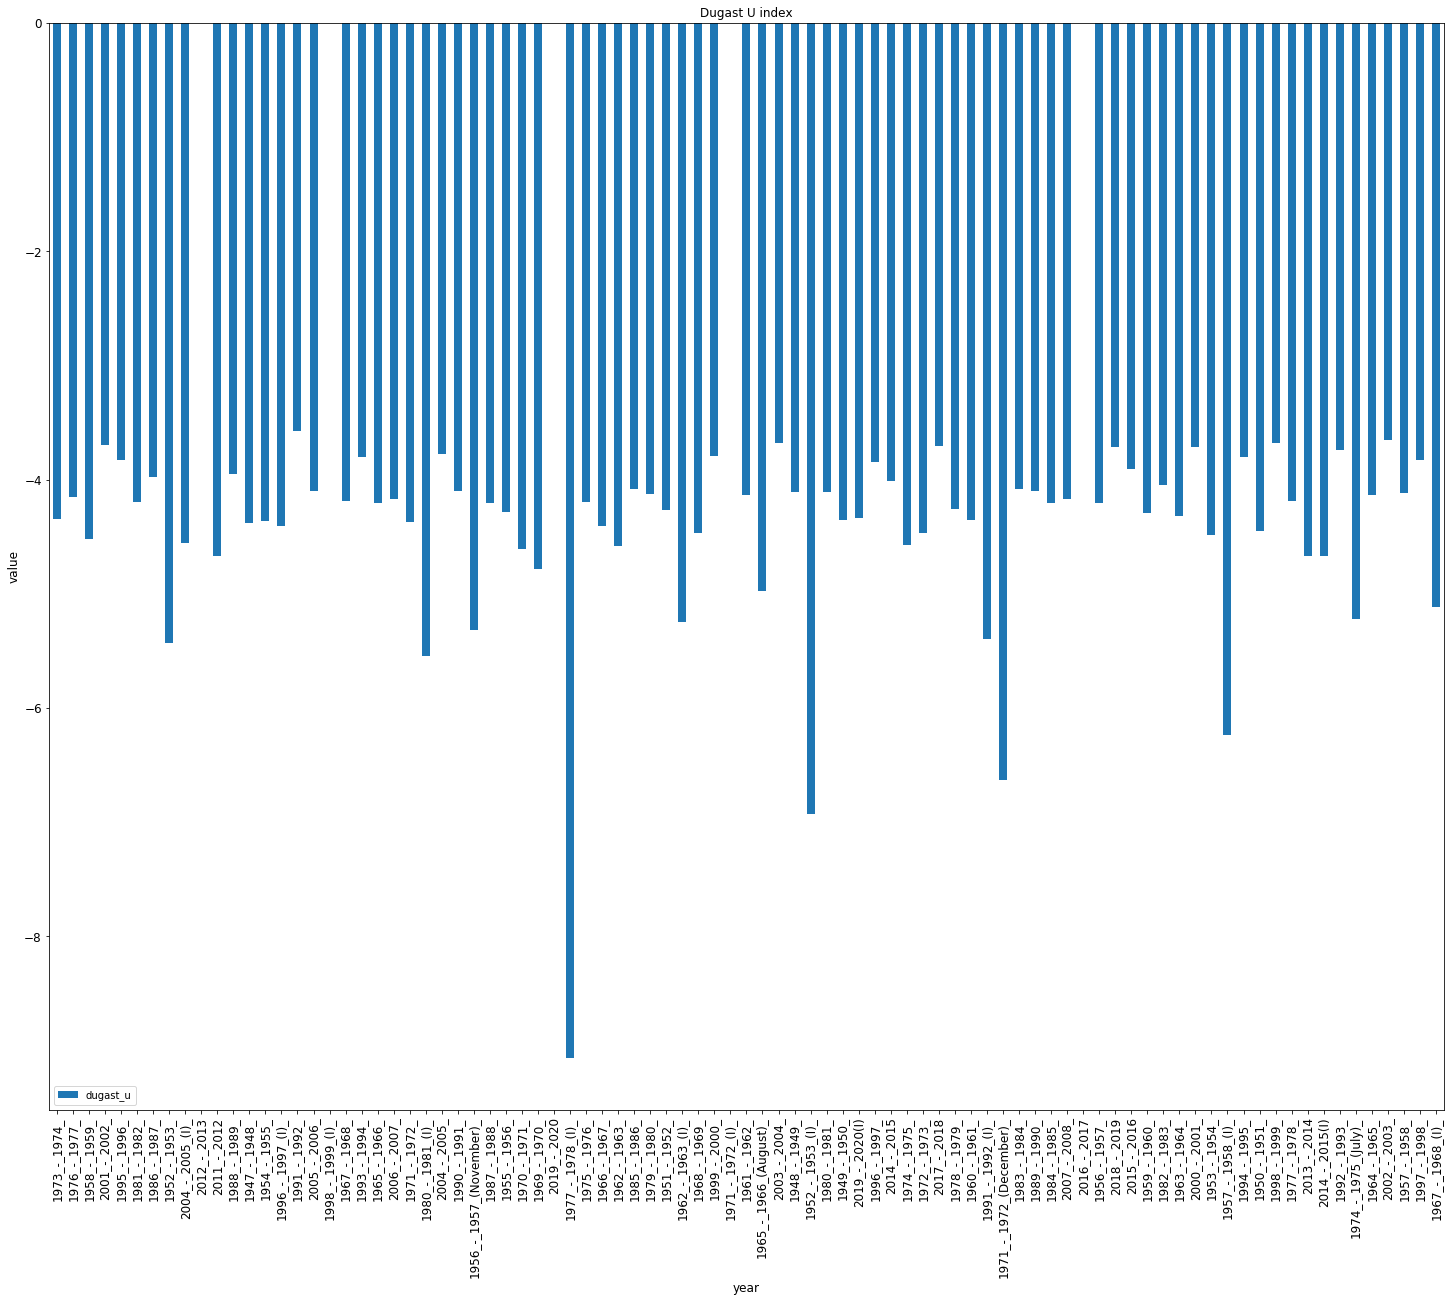

In [107]:
ax = new_df.plot(x='year', y='dugast_u', kind='bar', title ="Dugast U index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 1991-92 budget is the highest and that of 1977-78(I) is the lowest.

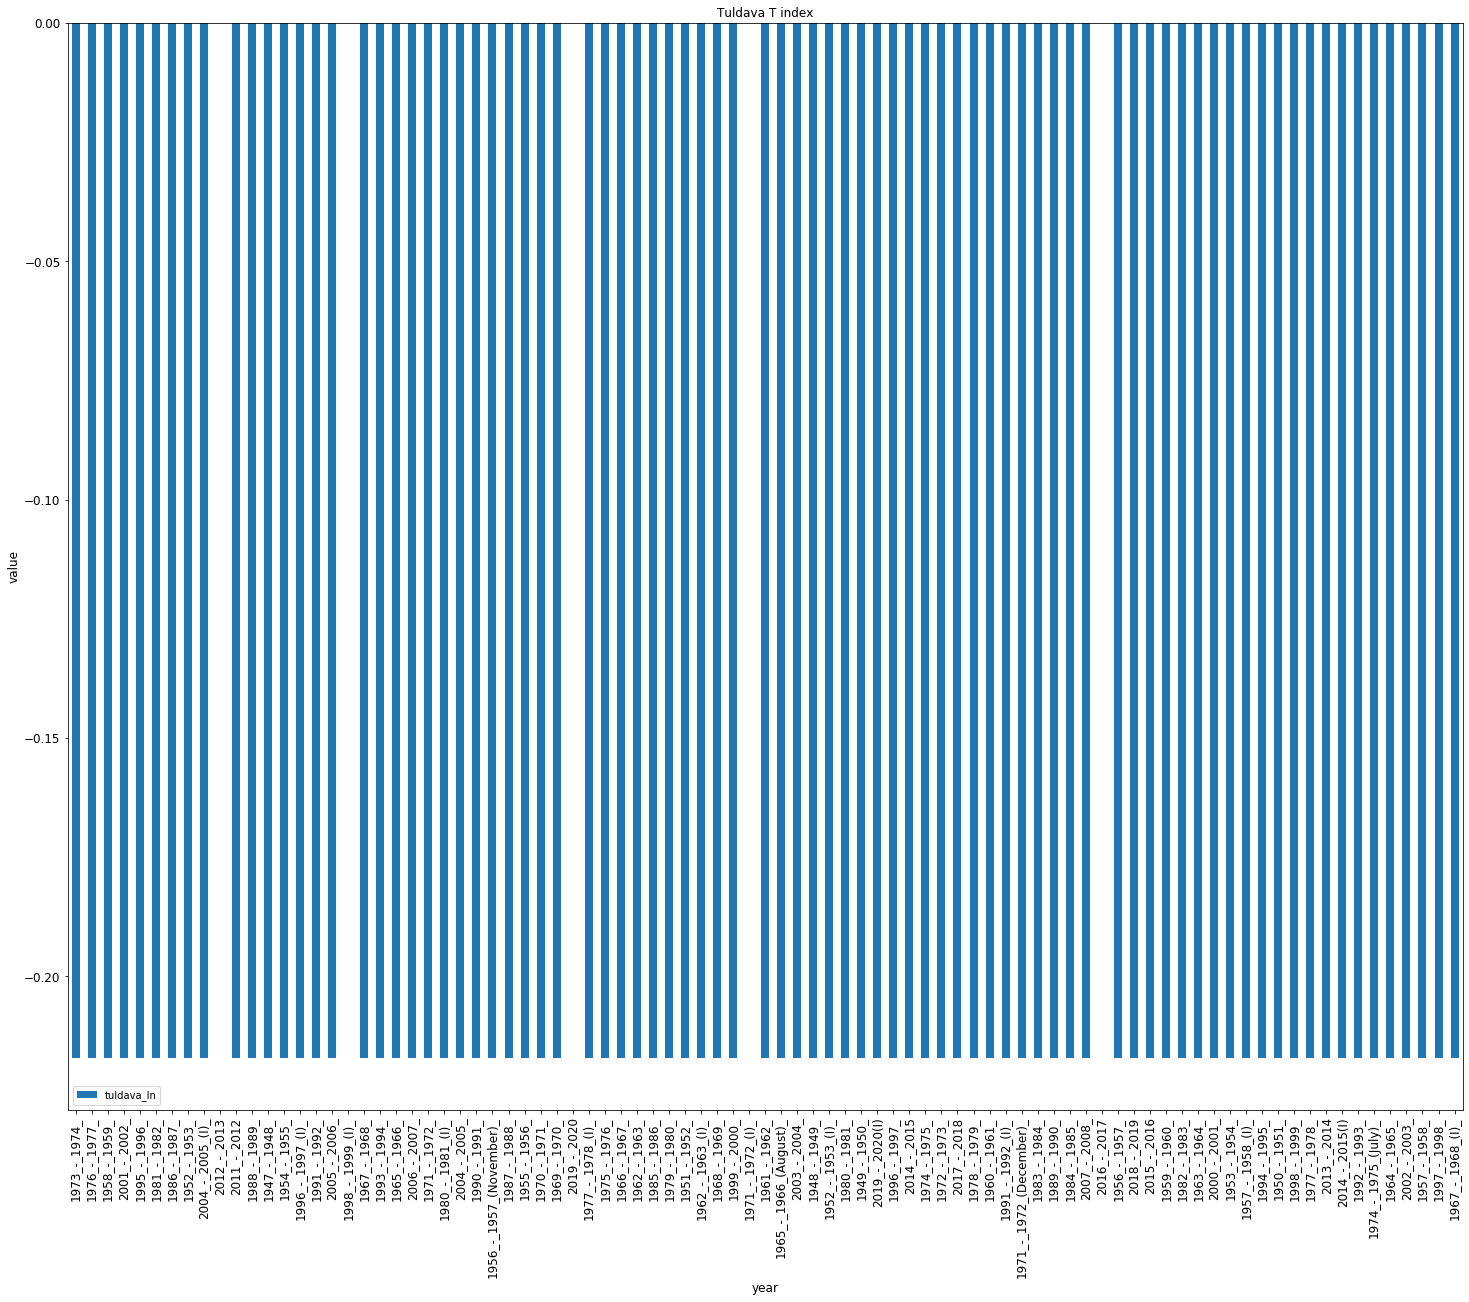

In [108]:
ax = new_df.plot(x='year', y='tuldava_ln', kind='bar', title ="Tuldava T index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

I'm not sure why the values are uniform. need to double check the formulae

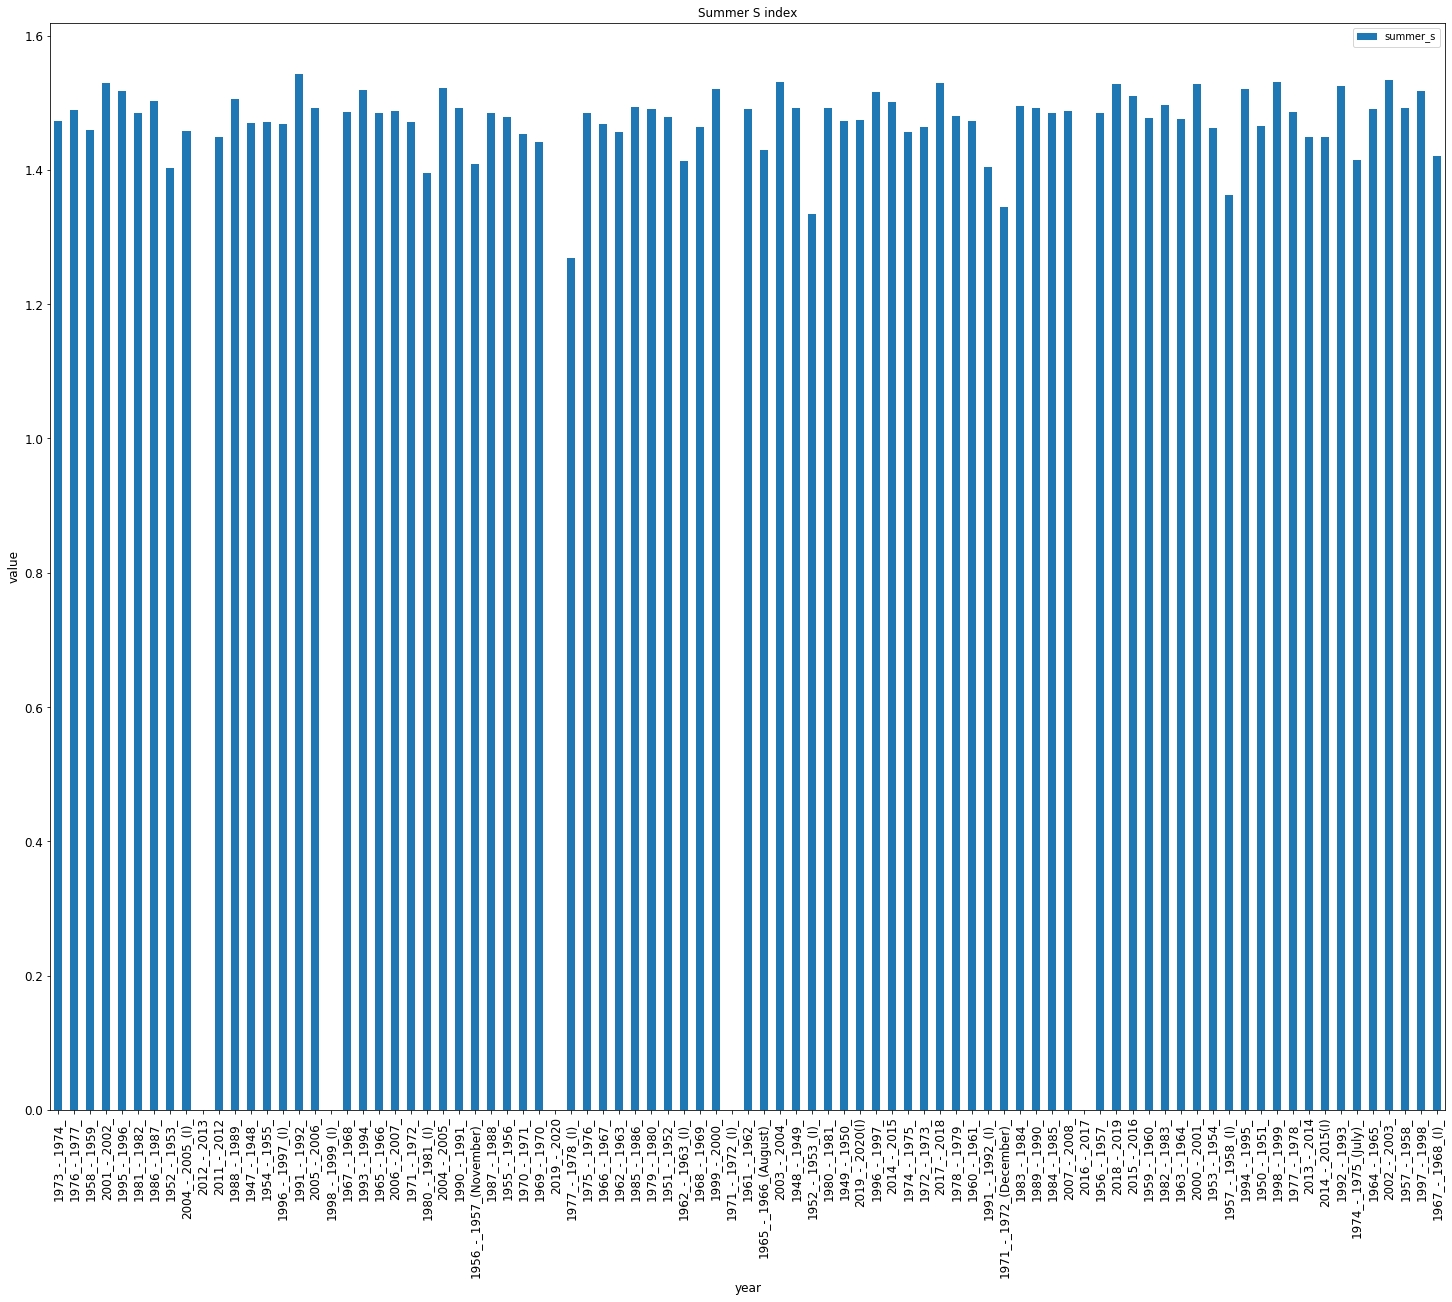

In [110]:
ax = new_df.plot(x='year', y='summer_s', kind='bar', title ="Summer S index", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

From the above graph, the lexical richness of 1991-92 budget is the highest and that of 1977-78(I) is the lowest.

### Discussion

More analysis to follow. (I've barely scratched the surface)